# Practica 5

<p style="text-align: left;"><span style="color: #000000;">Grupo 1:</span></p>
<ul>
<li style="text-align: left;"><span style="color: #000000;">Felipe Bedoya Casta&ntilde;o</span></li>
<li style="text-align: left;"><span style="color: #000000;">Mirai Alejandro Kaneko</span></li>
<li style="text-align: left;"><span style="color: #000000;">Alejandro Giraldo Sarria</span></li>
<li style="text-align: left;"><span style="color: #000000;">Marianela Arcila</span></li>
</ul>

In [210]:
#Librerias
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph
import cv2
import skimage.color as color
from skimage.draw import rectangle
from skimage.measure import label, regionprops, find_contours
from skimage.transform import rotate
import math
from scipy.stats import kurtosis, skew
from skimage.feature import greycomatrix,greycoprops

# 1.

Lea la imagen "res/jirafa.png" y realice:

1. Extracción de bordes mediante erosión y dilatación.
2. Extracción de bordes mediante la función gradiente.
3. Extracción de bordes mediante la operación XOR entre dilatación y erosión.

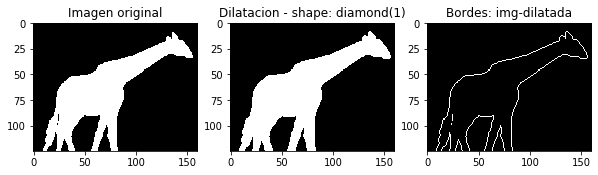

In [29]:
#DILATACION
#leer y binarizar la imagen
img = skimage.io.imread('res/jirafa.png',as_gray=True)
img = img > 0

#Mascara
#Tamano variable
masksize = 1
mask = morph.diamond(masksize)

#dilatar la imagen
dilation = morph.binary_dilation(img,mask)

fig, ax = plt.subplots(1,3, figsize=(10, 7))
ax[0].set_title('Imagen original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title(f'Dilatacion - shape: diamond({masksize})')
ax[1].imshow(dilation, cmap='gray')
ax[2].set_title('Bordes: img-dilatada')
ax[2].imshow(np.logical_xor(img,dilation), cmap='gray')
plt.savefig('bordes.png')

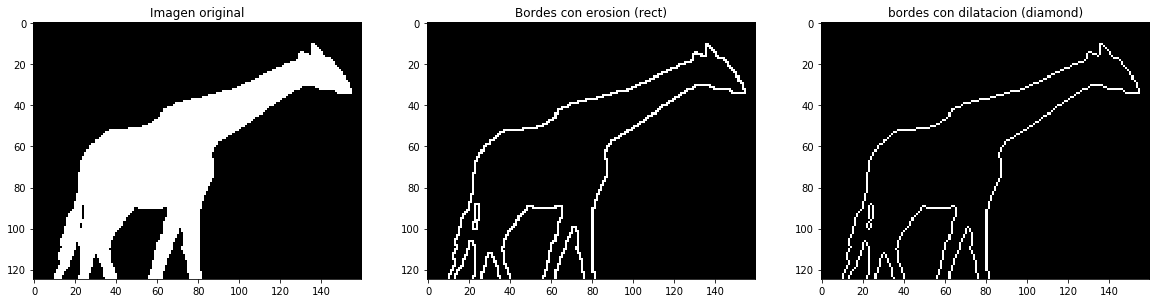

In [35]:
#EROSION
#mascaras
#variar tamanos
rectsize = 3
diamond = 1
maskrect = morph.rectangle(rectsize,rectsize)
maskdiamond = morph.diamond(diamond)

erodedrect = morph.binary_erosion(img,maskrect)
erodeddiamond = morph.binary_erosion(img,maskdiamond)

fig, ax = plt.subplots(1,3, figsize=(20, 10))
ax[0].set_title('Imagen original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Bordes con erosion (rect)')
ax[1].imshow(np.logical_xor(img,erodedrect), cmap='gray')
ax[2].set_title('bordes con dilatacion (diamond)')
ax[2].imshow(np.logical_xor(img, erodeddiamond), cmap='gray')

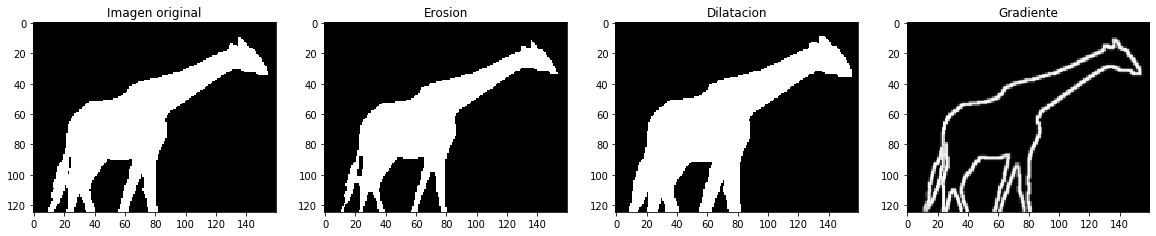

In [48]:
#GRADIENTE

#sin binarizar
imgnb = skimage.io.imread('res/jirafa.png',as_gray=True)

#crear el kernel
dimkernel = 3
kernel = np.ones((dimkernel,dimkernel),np.uint8)

#Transformar
dilated = morph.binary_dilation(imgnb,kernel)
eroded =  morph.binary_erosion(imgnb,kernel)
gradient = cv2.morphologyEx(imgnb,cv2.MORPH_GRADIENT,kernel)

fig, ax = plt.subplots(1,4, figsize=(20, 10))
ax[0].set_title('Imagen original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Erosion')
ax[1].imshow(eroded, cmap='gray')
ax[2].set_title('Dilatacion')
ax[2].imshow(dilated, cmap='gray')
ax[3].set_title('Gradiente')
ax[3].imshow(gradient, cmap='gray')

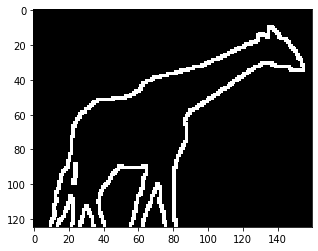

In [49]:
#XOR

xor = np.logical_xor(eroded,dilated)
plt.clf()
plt.imshow(xor,cmap='gray')

# 2.

<br> Lea la imagen "res/silueta.png" y obsérvela cuidadosamente. </br>
<br> Lea también, la imagen "res/silueta2.png" y repita el proceso. </br>
<br> Las imágenes tienen dos tipos de ruido distintos colocados con una serie de cuidadosas operaciones hechas en paint </br>

Utilice morfologías de  apertura y cierre (escogiendo la máscara adecuada) para eliminar el ruido sin afectar demasiado la silueta de la jirafa.

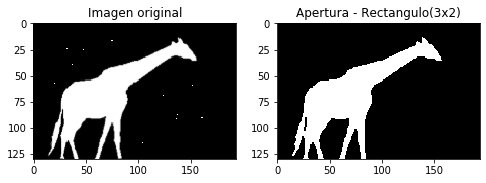

In [60]:
#leer imagen
silueta = skimage.io.imread('res/silueta.png',as_gray=True)

#dimensiones mascara rectangular
height = 3
width = 2
mask = morph.rectangle(height,width)

apertura = morph.binary_erosion(silueta,mask)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('Imagen original')
ax1.imshow(silueta, cmap='gray')
ax2.set_title(f'Apertura - Rectangulo({height}x{width})')
ax2.imshow(apertura, cmap='gray')

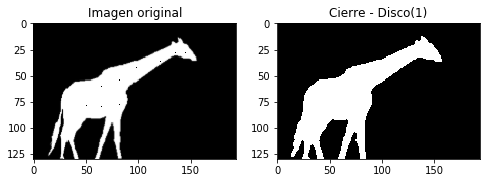

In [75]:
#lee imagen
silueta2 = skimage.io.imread('res/silueta2.png',as_gray=True)

#dimension mascara disco
radius = 1
mask = morph.disk(radius)

cierre = morph.binary_closing(silueta2,mask)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 5))
ax1.set_title('Imagen original')
ax1.imshow(silueta2, cmap='gray')
ax2.set_title(f'Cierre - Disco({radius})')
ax2.imshow(cierre, cmap='gray')

# 3.

1. Lea la imagen "res/jirafa.png" en escala de grises.

Realice un etiquetado de regiones escogiendo la máscara correcta (no necesariamente un rectángulo, prueba un disco o la identidad).

<img src = "res/etiq.png">

<center><i>Figura: Solución aproximada</i></center>

Imprima el número de etiquetas (Debe ser 1)

2. Ya que ha leido la imagen "res/jirafa.png" utilice el método de esqueletización de Zhang para obtener el esqueleto de ésta imagen (recuerde que es una imagen binaria).

Numero de lables: 1


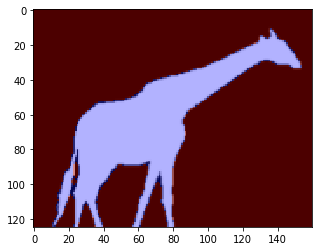

In [98]:
#leer imagen, binarizar
img = skimage.io.imread('res/jirafa.png',as_gray=True)
imgbinary = img > 0

#dimensiones mascaras
radius = 1
sizeiden = 5

disk = morph.disk(radius)
iden = np.identity(sizeiden)

erodedisk = morph.binary_erosion(imgbinary,disk)
erodeiden = morph.binary_erosion(imgbinary,iden)

labels, nlabels = morph.label(erodedisk,return_num=True,connectivity=1)
overlay = color.label2rgb(labels,image=img)
plt.imshow(overlay)
print(f'Numero de lables: {nlabels}')

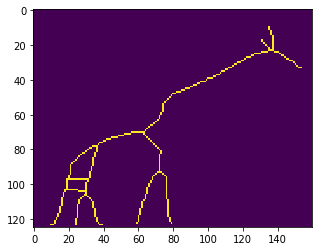

In [102]:
#esqueleto
#se toma la imagen binaria
skeleton = morph.skeletonize(imgbinary)
plt.imshow(skeleton)

# 4.

Cree una imagen de ceros (np.zeros()) de 600x600, posteriormente un cuadrado de 100x100, cuyo <i>start</i> está en la coordenada [200,200] (Utilice la función rectangle de skimage, es un proceso análogo a dibujar la elipse)


<img src = "res/pis.png">

<center><i>Figura: Cuadrado</i></center>

Una vez tenga la imagen anterior, realice los siguientes pasos (Debe realizar UN SOLO PLOT POR CADA NUMERAL listado a continuación)

1. Plotee el cuadrado que creó, imprima el área y el perímetro respectivos.
2. Imprima el cuadrado con el centroide, adicionalmente imprima las coordenadas del centroide.
3. Imprima el cuadrado rodeado por el rectángulo más pequeño que lo rodea (si quiere puede mostrarlo con el centroide)
4. Muestre las distancias respecto al contorno.
5. Imprima el cuadrado con el centroide y el contorno, junto a la medida entre el contorno y el centroide.
6. ¿Cuál es el diámetro equivalente? imprímalo.
7. Imprima los momentos de HU y sus logaritmos.

El perimetro es: 400.0 pixeles
El area es: 10201 pixeles


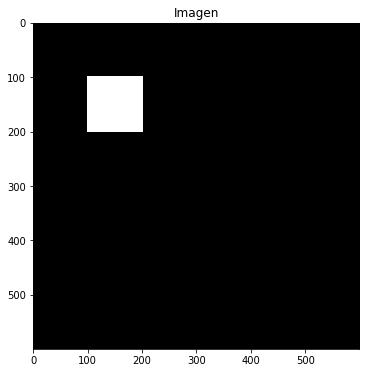

In [122]:
#crear imagen
img = np.zeros((600,600))

#dibujar rectangulo
r, c = rectangle((200,200),(100,100))
#insertar en imagen
img[r,c] = 1

#label
labeled = label(img)

properties = regionprops(labeled)

area = properties[0].area
perim = properties[0].perimeter

fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.set_title('Imagen')
ax.imshow(labeled, cmap='gray', vmin=0, vmax=1)
print(f'El perimetro es: {perim} pixeles')
print(f'El area es: {area} pixeles')

El centroide esta en (150.0,150.0)


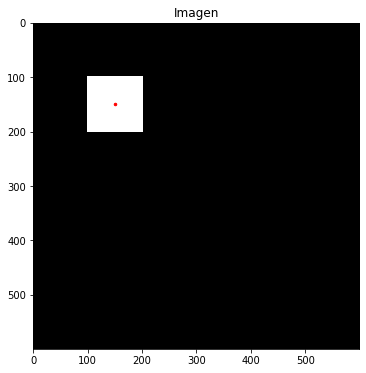

In [124]:
#centroide

y, x = properties[0].centroid
print(f'El centroide esta en ({x},{y})')
fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.set_title('Imagen')
ax.plot(x,y,'.r',markersize=5)
ax.imshow(labeled, cmap='gray', vmin=0, vmax=1)

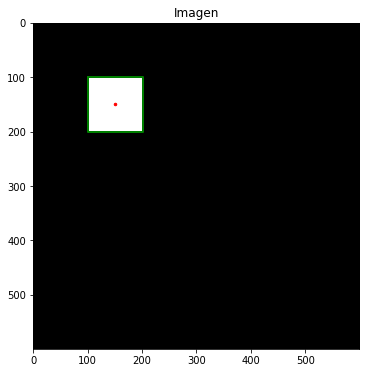

In [131]:
#rectangulo envolvente
minr, minc, maxr, maxc = properties[0].bbox
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)

fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.set_title('Imagen')
ax.plot(x,y,'.r',markersize=5)
ax.plot(bx,by,'-g',linewidth=2)
ax.imshow(labeled, cmap='gray', vmin=0, vmax=1)

Distancia minima: 51.0 pixeles
Distancia maxima: 71.42128534267638 pixeles


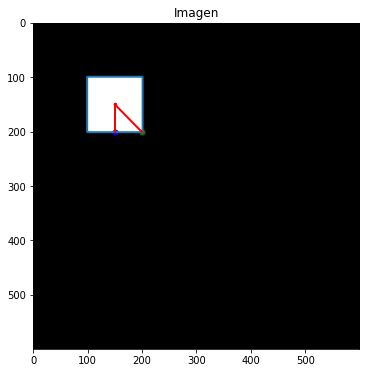

In [159]:
#funcion para distancia euclidiana
def distance(x,y):
    distance = math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2)
    return distance

contours = find_contours(labeled,0)
contour = contours[0]

dmin = None
minp = None
dmax = None
maxp = None

for point in contour:
    
    x1 = point[1]
    y1 = point[0]
    dist = distance((x,y),(x1,y1))
    
    if not dmin or dist < dmin:
        dmin = dist
        minp = (x1,y1)
    if not dmax or dist > dmax:
        dmax = dist
        maxp = (x1,y1)

fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.set_title('Imagen')
ax.plot(x,y,'.r',markersize=5)
ax.plot(maxp[0],maxp[1],'.g',markersize=10)
ax.plot(minp[0],minp[1],'.b',markersize=10)
for n, contour in enumerate(contours):
    ax.plot(contour[:,1],contour[:,0],linewidth=2)
ax.plot((x,maxp[0]),(y,maxp[1]),'-r',linewidth=2)
ax.plot((x,minp[0]),(y,minp[1]),'-r',linewidth=2)
ax.imshow(labeled, cmap='gray', vmin=0, vmax=1)
print(f'Distancia minima: {dmin} pixeles')
print(f'Distancia maxima: {dmax} pixeles')

Distancia media al contorno: 58.43625142638471 pixeles


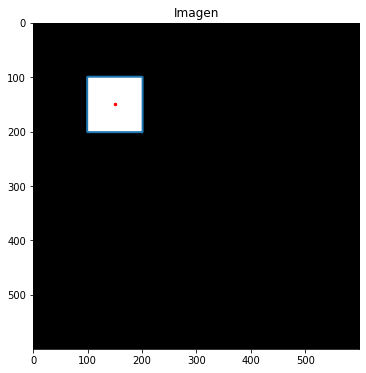

In [164]:
accd = 0

for point in contour:
    x1 = point[1]
    y1 = point[0]
    accd += distance((x,y),(x1,y1))

avgdistance = accd/len(contour)

fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.set_title('Imagen')
ax.plot(x,y,'.r',markersize=5)
for n, contour in enumerate(contours):
    ax.plot(contour[:,1],contour[:,0],linewidth=2)
ax.imshow(labeled, cmap='gray', vmin=0, vmax=1)
print(f'Distancia media al contorno: {avgdistance} pixeles')

El diamtro equivalente es: 113.96629587664677 pixeles


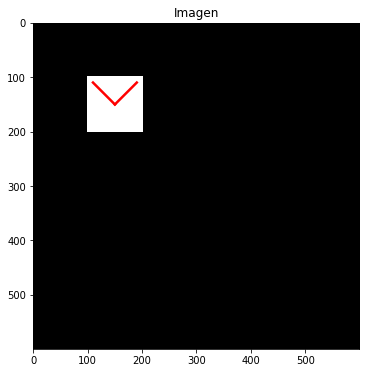

In [170]:
diam = properties[0].equivalent_diameter

orientation = properties[0].orientation

x1 = x + math.cos(orientation) * 0.5 * diam
x2 = y - math.sin(orientation) * 0.5 * diam
y1 = x - math.sin(orientation) * 0.5 * diam
y2 = y - math.cos(orientation) * 0.5 * diam

fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.set_title('Imagen')
ax.plot((x, x1), (y, y1), '-r', linewidth=2.5)
ax.plot((x, x2), (y, y2), '-r', linewidth=2.5)
ax.imshow(labeled, cmap='gray', vmin=0, vmax=1)
print(f'El diamtro equivalente es: {diam} pixeles')

In [186]:
hu = properties[0].moments_hu

#nonzero = 0
nonzero = 0.0000001

print(f'Momentos HU: {hu+nonzero}')

hulog = -np.sign(hu) * np.log(np.abs(hu+nonzero))

print(f'Logaritmos: {hulog}')

print('Se sumo un error para evitar division por 0')

Momentos HU: [1.66650428e-01 1.00000000e-07 1.00000000e-07 1.00000000e-07
 1.00000000e-07 1.00000000e-07 1.00000000e-07]
Logaritmos: [1.7918569 0.        0.        0.        0.        0.        0.       ]
Se sumo un error para evitar division por 0


# 5.

Lea la imagen "res/cancer.bmp" y la máscara "res/lesion.bmp", utilice los algoritmos de extracción de características para encontrar los estadísticos de primer y segundo orden de esta imagen. Preste especial atención a este proceso individual, puesto que en el ejercicio guiado lo hará para varias imágenes.

In [216]:
###############################FUNCIONES FEATURES###################

#Definir la función para obtener características del espacio LAB y HSV
def get_lab_hsv_features(im, mask, features):
    #La imagen de entrada debe estar en el espacio RGB
    #Extraer el tamaño de la imagen de entrada y convertirla a LAB y HSV
    shape = np.shape(im)
    im_lab = cv2.cvtColor(im,cv2.COLOR_RGB2LAB)
    im_hsv = cv2.cvtColor(im,cv2.COLOR_RGB2HSV)
    
    #Definir los canales l,a,b por separado
    l = im_lab[:,:,0]
    s = im_hsv[:,:,1]
    v = im_hsv[:,:,2]
    #Definir listas vacías de canales h,s,v
    h_1 = []
    s_1 = []
    v_1 = []
    
    #Recorrer cada posición i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array verdadero añadir
            #a cada canal del nuevo HSV el píxel en esta posición
            if((mask[i][j] == np.array([True, True, True])).all() ):
                h_1.append(l[i][j])
                s_1.append(s[i][j])
                v_1.append(v[i][j])
                
    #Utilizar features para guardar los valores de media, desviación estándar, kurtosis y sesgo
    #de cada uno de los canales h_1, s_1, v_1
    features['h_mean'] = np.mean(h_1)
    features['h_std'] = np.std(h_1)
    features['h_kurtosis'] = kurtosis(h_1)
    features['h_skew'] = skew(h_1)
    features['s_mean'] = np.mean(s_1)
    features['s_std'] = np.std(s_1)
    features['v_kurtosis'] = kurtosis(v_1)
    features['v_skew'] = skew(v_1)
    features['v_mean'] = np.mean(v_1)
    features['v_std'] = np.std(v_1)
    features['s_kurtosis'] = kurtosis(s_1)
    features['s_skew'] = skew(s_1)
    return features

#Definir función para extraer características del espacio RGB
def get_rgb_features(im,mask, features):
    #Crear una matriz del mismo tamaño de la imagen de entrada, leer los canales R,G,B y 
    #crear listas vacías donde se aplica la máscara
    shape = np.shape(im)
    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]
    r_1 = []
    g_1 = []
    b_1 = []
    #Recorrer las posiciones i,j de la matriz de la imagen de entrada
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Condicional, si la máscara en la posición i,j es un array de True, añadir
            #a cada canal del nuevo espacio RGB el píxel en esta posición
            if( (mask[i][j] == np.array([True, True, True])).all() ): 
                r_1.append(r[i][j])
                g_1.append(g[i][j])
                b_1.append(b[i][j])
    #Utilizar features para guardar los valores de media, desv.estandar, kurtosis y sesgo
    #de los canales r_1,g_1,b_1
    features['r_mean'] = np.mean(r_1)
    features['r_std'] = np.std(r_1)
    features['r_kurtosis'] = kurtosis(r_1)
    features['r_skew'] = skew(r_1)
    features['g_mean'] = np.mean(g_1)
    features['g_std'] = np.std(g_1)
    features['b_kurtosis'] = kurtosis(b_1)
    features['b_skew'] = skew(b_1)
    features['b_mean'] = np.mean(b_1)
    features['b_std'] = np.std(b_1)
    features['g_kurtosis'] = kurtosis(g_1)
    features['g_skew'] = skew(g_1)
    return features

#Función de estadísticos de segundo orden
def get_glcm_features(img,features):
    
    #Calcular el nivel co-ocurrente de gris
    glcm = greycomatrix(img, [1,2,3], [0], 256, symmetric=True, normed=True)
    #Calcular la dissimilaridad, contraste, homogeneidad, ASM, energía y correlación, guardar esto en la matriz
    #de features
    #separador
    features['----'] = '----------------------------'
    #separador
    features['dissimilarity'] = greycoprops(glcm, 'dissimilarity')[0][0]
    features['contrast'] = greycoprops(glcm, 'contrast')[0][0]
    features['homogeneity'] =greycoprops(glcm, 'homogeneity')[0][0]
    features['ASM'] = greycoprops(glcm, 'ASM')[0][0]
    features['energy'] =greycoprops(glcm, 'energy')[0][0]
    features['correlation'] = greycoprops(glcm, 'correlation')[0][0]
    
    return features
#Función de extracción de características de los canales rgb, lab-hsv
def features_pipeline(img, mask):
    features = {}
    features = get_rgb_features(img,mask,features)
    features = get_lab_hsv_features(img,mask,features)
    features = get_glcm_features(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY),features)
    return features


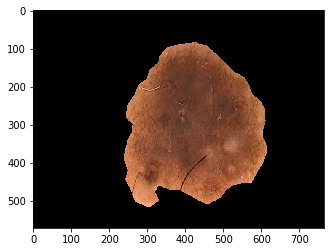

In [217]:
img = cv2.imread('res/cancer.bmp',cv2.IMREAD_COLOR)
mask = cv2.imread('res/lesion.bmp',cv2.IMREAD_COLOR)
mask = mask > 128
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = img*mask

features = features_pipeline(img,mask)
plt.imshow(img)

In [218]:
features

{'r_mean': 146.88798263992817,
 'r_std': 35.676723632034886,
 'r_kurtosis': -0.6618763570862356,
 'r_skew': 0.4596421888251554,
 'g_mean': 85.67200438990322,
 'g_std': 25.688268030627587,
 'b_kurtosis': 1.5539723268111416,
 'b_skew': 1.0231220419543297,
 'b_mean': 56.100136353054644,
 'b_std': 18.35799542951593,
 'g_kurtosis': 0.09600887736926511,
 'g_skew': 0.7703928843347255,
 'h_mean': 108.89899896903788,
 'h_std': 28.421799819402565,
 'h_kurtosis': -0.3828987716618122,
 'h_skew': 0.5696058902117508,
 's_mean': 158.28866939372776,
 's_std': 16.33175866436164,
 'v_kurtosis': -0.6618763570862356,
 'v_skew': 0.4596421888251554,
 'v_mean': 146.88798263992817,
 'v_std': 35.676723632034886,
 's_kurtosis': 2.8066625028984618,
 's_skew': 0.2393586838215034,
 '----': '----------------------------',
 'dissimilarity': 1.8544694833961863,
 'contrast': 67.12028155090991,
 'homogeneity': 0.7737342141687933,
 'ASM': 0.5237357899074601,
 'energy': 0.7236959236498849,
 'correlation': 0.9849313303792